In [4]:
import sys, os
sys.path.append(os.path.abspath("./../../feedback-grape"))
sys.path.append(os.path.abspath("./../../"))
sys.path.append(os.path.abspath("./../"))

from matplotlib import pyplot as plt
import numpy as np

from plot_helpers import (
    open_from_dir,
)

In [5]:
dir_ = "./01_results"

fid_model_mat, params_model_each = open_from_dir(dir_ + "/eval", sort_by=["Nqubits","t"])
fid_base_mat, params_base_each = open_from_dir(dir_ + "/baseline")

fid_base_list = [row for row in fid_base_mat]
labels = []
fid = []

# For each parameter setting in the model data, find the corresponding baseline data
for i in range(len(params_model_each)-1, -1, -1):
    params_model = params_model_each[i]
    found = False
    for j in range(len(params_base_each)):
        params_base = params_base_each[j]
        if all(params_model[k] == params_base[k] for k in ["Nqubits","gammaz","gammam"]):
            found = True
            break
    if found:
        labels.append(f"base N={params_model['Nqubits']}")
        fid.append(fid_base_list[j])
        del params_base_each[j]
        del fid_base_list[j]

    labels.append(f"model N={params_model['Nqubits']}, t={params_model['t']}")
    fid.append(fid_model_mat[i])

fid = np.array(fid)

Opening files...


100%|██████████| 7/7 [00:00<00:00, 76.01it/s]


Done.
Opening files...


100%|██████████| 3/3 [00:00<00:00, 1820.44it/s]

Done.


Text(0.5, 1.0, 'Fidelity Comparison Between Baseline and Model Implementations')

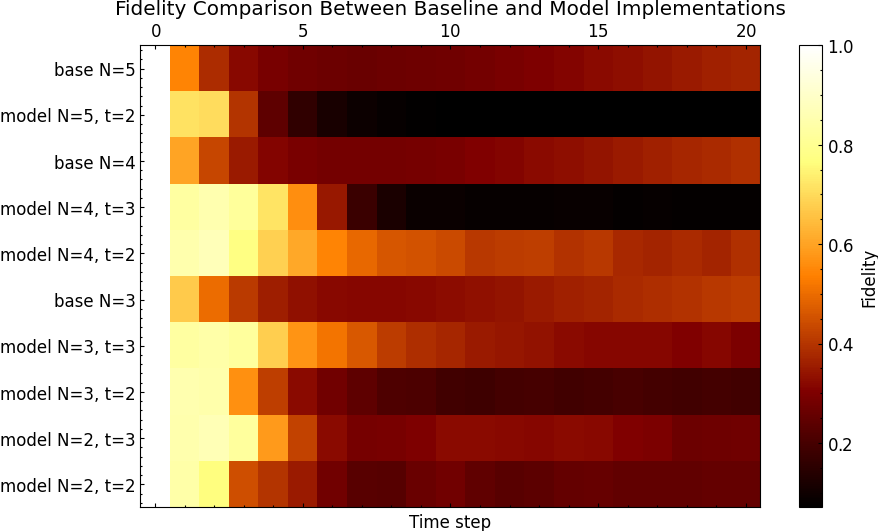

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.matshow(fid, cmap='afmhot', aspect='auto')
fig.colorbar(cax, label='Fidelity')

ax.set_xlabel("Time step")
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_title("Fidelity Comparison Between Baseline and Model Implementations")